In [1]:
import numpy as np
import pandas as pd

In [2]:
from time import time

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_excel(r"C:\Users\HP\Downloads\cria-record2.xlsx")

In [5]:
df.head()

,CRIA Number,Importer TIN,Application Reference,Product Description,Batches,Satisfactory,Modified By,CRIA Agent,Submission,Product Class,Analysis Lab,Inspection Date,Analysis Date,CRIA Date,Remarks
0,IN/SIL/2021/30/2387,17830885-0001,1574247539914-1,TRAMADOL CAPSULE,21357301,YES,nthakkar-XI,SILIS LABS PVT LTD,Completed,Drug,Vaibhav Analytical Services,2021-03-20,2021-03-26,2021-03-31,SATISFACTORY
1,IN/SIL/2021/31/2388,01365071-0001,1603818911537-1,AMBER DSR (DRY STRENGHT RESIN) (ACRYLAMIDE MOD...,AGI0003,YES,nthakkar-XI,SILIS LABS PVT LTD,Completed,Chemicals and other Raw Materials,Anazeal Analytical and Research PVY Ltd.,2021-02-13,2021-02-22,2021-03-31,SATISFACTORY
2,IN/SIL/2021/34/2389,19966185-0001,1614919413161-1,MEROCLAV 625 TABLET,"XPBJ1002 ,XPBJ1001",YES,nthakkar-XI,SILIS LABS PVT LTD,Completed,Drug,Vaibhav Analytical Services,2021-03-15,2021-03-23,2021-03-31,SATISFACTORY
3,IN/SIL/2021/35/2390,19966185-0001,1614918711615-1,MEROCLAV FOR ORAL SUSPENSION,XPBK1001,YES,nthakkar-XI,SILIS LABS PVT LTD,Completed,Drug,Vaibhav Analytical Services,2021-03-15,2021-03-31,2021-03-31,SATISFACTORY
4,IN/SIL/2021/37/2392,19966185-0001,1614855511440-1,MEROXIM 500 TABLETS,11471,YES,nthakkar-XI,SILIS LABS PVT LTD,Completed,Drug,Vaibhav Analytical Services,2021-03-10,2021-03-15,2021-03-31,SATISFACTORY


In [6]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", -1)

In [7]:
df["Analysis Lab"].unique()

array(['Vaibhav Analytical Services',
       'Anazeal Analytical and Research PVY Ltd.',
       'Chemo Test Laboratory',
       'Shanghai Institute of Quality Inspection and Technical Research Laboratory',
       'ARBRO Pharmaceuticals PVT Ltd. Analytical Division',
       'NONE - DCR Issued', 'King Test Technical Company',
       'Others - Others - Others - Technical Center of Gongbei Customs District P.R. China',
       'Hangzhou Institute for Food and Drugs control',
       'Shanghai Institute for Food and Drug Control Laboratory',
       'Konark Research Foundation',
       'Others - Technical Center of Gongbei Customs District P.R. China',
       'Guangzhou Research Institute of Petrochemical and fine Chemicals',
       'Tianjin International Joint Academy of Biomedicine',
       'Zhejiang Fangyuan Test Group Co. Ltd',
       'Others - TESTING CENTER OF GUANGDONG INSTITUTE OF TRADITIONAL CHINESE MEDICINE',
       'Others - Guangzhou Research Institute of Petrochemical and fine Che

In [8]:
gongbei_technical = df[(df['Analysis Lab'].str.contains("GONGBEI") | df['Analysis Lab'].str.contains("Gongbei")) & (df['Analysis Lab'].str.contains("Guangzhou") == False)]
#replace for gongbei_technical
for i in list(gongbei_technical.index):
    df.at[i, "Analysis Lab"] = "Others - Technical Center of Gongbei Customs District P.R. China"

In [9]:
guangzhou_research = df[df['Analysis Lab'].str.contains("Guangzhou Research Institute") | df['Analysis Lab'].str.contains("GUANGZHOU RESEARCH INSTITUTE")]
#replace for guangzhou_research
for i in list(guangzhou_research.index):
    df.at[i, "Analysis Lab"] = "Guangzhou Research Institute of Petrochemical and fine Chemicals"

In [10]:
guangzhou_inspection = df[df['Analysis Lab'].str.contains("Guangzhou Inspection") | df['Analysis Lab'].str.contains("GUANGZHOU INSPECTION") | df['Analysis Lab'].str.contains("Guangzhou inspection")]
#replace for guangzhou_inspection
for i in list(guangzhou_inspection.index):
    df.at[i, "Analysis Lab"] = "Others - Guangzhou Inspection Testing and Certification Group Co.,Ltd"

In [11]:
shimadzu =df[df['Analysis Lab'].str.contains("Shimadzu") | df['Analysis Lab'].str.contains("SHIMADZU")]
#replace for shimadzu
for i in list(shimadzu.index):
    df.at[i, "Analysis Lab"] = "Others - SHIMADZU (GUANGZHOU) ANALYSIS ＆ TECHNOLOGY SERVICES CO., LTD."

In [12]:
guangzhou_king_test = df[df['Analysis Lab'].str.contains("Guangzhou King Test") | df['Analysis Lab'].str.contains("GUANGZHOU KING TEST")]
#replace for guangzhou_king_test
for i in list(guangzhou_king_test.index):
    df.at[i, "Analysis Lab"] = "Others - Technical Center of Gongbei Customs District P.R. China &Guangzhou King Test Technology Co.,Ltd. TEST REPORT"

In [13]:
trustin = df[df['Analysis Lab'].str.contains("TRUSTIN") | df['Analysis Lab'].str.contains("Trustin")]
#replace for trustin
for i in list(trustin.index):
    df.at[i, "Analysis Lab"] = "Others - TRUSTIN ANALYTICAL SOLUTION PRIVATE LIMITED"

In [14]:
luxi_quality = df[df['Analysis Lab'].str.contains("Luxi") | df['Analysis Lab'].str.contains("LUXI")]
#replace for luxi_quality
for i in list(luxi_quality.index):
    df.at[i, "Analysis Lab"] = "Others - Quality Inspection Center of Luxi Chemical Group Co.,Ltd"

In [15]:
guangdong_construction = df[df['Analysis Lab'].str.contains("Guangdong Construction") | df['Analysis Lab'].str.contains("GUANGDONG CONSTRUCTION")]
#replace for guangdong_construction
for i in list(guangdong_construction.index):
    df.at[i, "Analysis Lab"] = "Others - Guangdong Construction Engineering Quality and Safety Inspection Station Co. Ltd"

In [16]:
guangdong_academy = df[(df['Analysis Lab'].str.contains("Analysis") | df['Analysis Lab'].str.contains("Analysis")) & (df['Analysis Lab'].str.contains('Technology') == False)]
#replace for guangdong_academy
for i in list(guangdong_academy.index):
    df.at[i, "Analysis Lab"] = "Others - Analysis & Testing Center，Institute of Chemical Engineering,Guangdong Academy of Sciences"

In [17]:
jiangsu = df[df['Analysis Lab'].str.contains("Jiangsu") | df['Analysis Lab'].str.contains("JIANGSU")]
#replace for jiangsu
for i in list(jiangsu.index):
    df.at[i, "Analysis Lab"] = "Others - JIANGSU RUIXIANG CHEMICAL CO.,LTD"

In [18]:
itl_labs = df[df['Analysis Lab'].str.contains("ITL") | df['Analysis Lab'].str.contains("Itl")]
#replace for itl_labs
for i in list(itl_labs.index):
    df.at[i, "Analysis Lab"] = "Others - ITL LABS PVT. LTD."

In [19]:
entry_exit = df[df['Analysis Lab'].str.contains("Entry") | df['Analysis Lab'].str.contains("ENTRY")]
#replace for entry_exit
for i in list(entry_exit.index):
    df.at[i, "Analysis Lab"] = "Others - ENTRY-EXIT INSPECTION AND QUARANTINE OF THE PEOPLE'S REPUBLIC OF CHINA"

In [20]:
societe = df[df['Analysis Lab'].str.contains("SOCIETE") | df['Analysis Lab'].str.contains("Societe")]
#replace for societe
for i in list(societe.index):
    df.at[i, "Analysis Lab"] = "Others - Societe Generale de Surveillance S.A.A"

In [21]:
epin = df[df['Analysis Lab'].str.contains("EPIN") | df['Analysis Lab'].str.contains("Epin")]
#replace for societe
for i in list(epin.index):
    df.at[i, "Analysis Lab"] = "Others - EPIN Suzhou Ltd"

In [22]:
guangdong_institute = df[df['Analysis Lab'].str.contains("GUANGDONG INSTITUTE") | df['Analysis Lab'].str.contains("Guangdong Institute")]
#replace for guangdong_institute
for i in list(guangdong_institute.index):
    df.at[i, "Analysis Lab"] = "Others - TESTING CENTER OF GUANGDONG INSTITUTE OF TRADITIONAL CHINESE MEDICINE"

In [23]:
tianjin = df[df['Analysis Lab'].str.contains("TIANJIN") | df['Analysis Lab'].str.contains("Tianjin")]
#replace for tianjin
for i in list(tianjin.index):
    df.at[i, "Analysis Lab"] = "Tianjin International Joint Academy of Biomedicine"

In [24]:
others = df[(df['Analysis Lab'] == "Others - Others - Others - ") | (df['Analysis Lab'] == "Others - ")]
#replace for others
for i in list(others.index):
    df.at[i, "Analysis Lab"] = np.nan

In [25]:
pd.DataFrame(list(df["Analysis Lab"].unique()))

,0
0,Vaibhav Analytical Services
1,Anazeal Analytical and Research PVY Ltd.
2,Chemo Test Laboratory
3,Shanghai Institute of Quality Inspection and Technical Research Laboratory
4,ARBRO Pharmaceuticals PVT Ltd. Analytical Division
5,NONE - DCR Issued
6,King Test Technical Company
7,Others - Technical Center of Gongbei Customs District P.R. China
8,Hangzhou Institute for Food and Drugs control
9,Shanghai Institute for Food and Drug Control Laboratory


In [26]:
#t0 = time()
#country = []
#for i in range(len(df)):
#   if "XI" in df["Modified By"][i]:
#        country.append("India")
#    elif "XC" in df["Modified By"][i]:
#        country.append("China")
#df["Country"] = country
#print("Running time: {} seconds.".format(round(time()-t0, 3)))

In [27]:
t0 = time()
df["Country"] = np.where(df["Modified By"].str.endswith("XI"), "India", "China")
print("Running time: {} seconds.".format(round(time()-t0, 3)))


Running time: 0.016 seconds.


In [28]:
df.head()

,CRIA Number,Importer TIN,Application Reference,Product Description,Batches,Satisfactory,Modified By,CRIA Agent,Submission,Product Class,Analysis Lab,Inspection Date,Analysis Date,CRIA Date,Remarks,Country
0,IN/SIL/2021/30/2387,17830885-0001,1574247539914-1,TRAMADOL CAPSULE,21357301,YES,nthakkar-XI,SILIS LABS PVT LTD,Completed,Drug,Vaibhav Analytical Services,2021-03-20,2021-03-26,2021-03-31,SATISFACTORY,India
1,IN/SIL/2021/31/2388,01365071-0001,1603818911537-1,AMBER DSR (DRY STRENGHT RESIN) (ACRYLAMIDE MODIFIED CATIONIC POLYMER),AGI0003,YES,nthakkar-XI,SILIS LABS PVT LTD,Completed,Chemicals and other Raw Materials,Anazeal Analytical and Research PVY Ltd.,2021-02-13,2021-02-22,2021-03-31,SATISFACTORY,India
2,IN/SIL/2021/34/2389,19966185-0001,1614919413161-1,MEROCLAV 625 TABLET,"XPBJ1002 ,XPBJ1001",YES,nthakkar-XI,SILIS LABS PVT LTD,Completed,Drug,Vaibhav Analytical Services,2021-03-15,2021-03-23,2021-03-31,SATISFACTORY,India
3,IN/SIL/2021/35/2390,19966185-0001,1614918711615-1,MEROCLAV FOR ORAL SUSPENSION,XPBK1001,YES,nthakkar-XI,SILIS LABS PVT LTD,Completed,Drug,Vaibhav Analytical Services,2021-03-15,2021-03-31,2021-03-31,SATISFACTORY,India
4,IN/SIL/2021/37/2392,19966185-0001,1614855511440-1,MEROXIM 500 TABLETS,11471,YES,nthakkar-XI,SILIS LABS PVT LTD,Completed,Drug,Vaibhav Analytical Services,2021-03-10,2021-03-15,2021-03-31,SATISFACTORY,India


In [29]:
df["Analysis Lab"].nunique()

36

In [30]:
df["Analysis Lab"].value_counts()

Chemo Test Laboratory                                                                                                    5934
Vaibhav Analytical Services                                                                                              2585
King Test Technical Company                                                                                              2570
Guangzhou Research Institute of Petrochemical and fine Chemicals                                                         2535
NONE - DCR Issued                                                                                                        2036
Others - Technical Center of Gongbei Customs District P.R. China                                                         1668
Anazeal Analytical and Research PVY Ltd.                                                                                 1505
Shanghai Institute of Quality Inspection and Technical Research Laboratory                                            

In [31]:
df_grouped = df.groupby(['Analysis Lab', 'Country'])['Analysis Lab', 'Country'].agg({'Analysis Lab':{'Lab Count':'count'}}).sort_values(['Lab Count'], ascending=False).reset_index()

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [32]:
df_grouped

,Analysis Lab,Country,Lab Count
0,Chemo Test Laboratory,India,5934
1,Vaibhav Analytical Services,India,2585
2,King Test Technical Company,China,2570
3,Guangzhou Research Institute of Petrochemical and fine Chemicals,China,2535
4,NONE - DCR Issued,India,2036
5,Others - Technical Center of Gongbei Customs District P.R. China,China,1668
6,Anazeal Analytical and Research PVY Ltd.,India,1505
7,Shanghai Institute of Quality Inspection and Technical Research Laboratory,China,1503
8,Konark Research Foundation,India,1425
9,Tianjin International Joint Academy of Biomedicine,China,1407


In [33]:
df_grouped.drop(4, axis=0, inplace=True)

In [34]:
df_grouped.iloc[5:]["Lab Count"].sum()

8048

In [35]:
df_plot = df_grouped.iloc[0:5]
df_plot

,Analysis Lab,Country,Lab Count
0,Chemo Test Laboratory,India,5934
1,Vaibhav Analytical Services,India,2585
2,King Test Technical Company,China,2570
3,Guangzhou Research Institute of Petrochemical and fine Chemicals,China,2535
5,Others - Technical Center of Gongbei Customs District P.R. China,China,1668


In [36]:
df_plot.loc[6] = ["Others", "Both",df_grouped.iloc[5:]["Lab Count"].sum()]

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
df_plot

,Analysis Lab,Country,Lab Count
0,Chemo Test Laboratory,India,5934
1,Vaibhav Analytical Services,India,2585
2,King Test Technical Company,China,2570
3,Guangzhou Research Institute of Petrochemical and fine Chemicals,China,2535
5,Others - Technical Center of Gongbei Customs District P.R. China,China,1668
6,Others,Both,8048


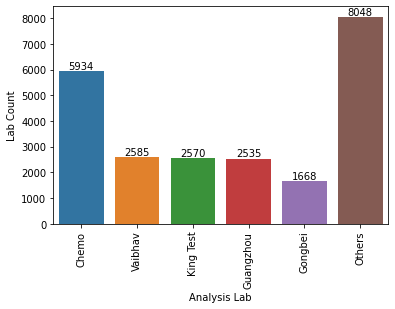

In [38]:
ax = sns.barplot(data=df_plot, x="Analysis Lab", y="Lab Count")
#set xticks and labels
ticks = [0,1,2,3,4,5]
labels = ["Chemo", "Vaibhav", "King Test", "Guangzhou", "Gongbei", "Others"]
plt.xticks(ticks, labels, rotation=90)
plt.xlabel("Analysis Lab")

plt.bar_label(ax.containers[0]);

In [44]:
df_grouped.to_excel("new_cria_record.xlsx")